# Mobile Price Prediction

A machine learning project for predicting mobile phone prices based on feature extraction and analysis.

## Problem Statement

In the competitive mobile phone market, accurate pricing is essential for boosting sales and maintaining profitability. Our organization, a leading mobile phone seller, aims to strengthen its pricing strategy by identifying key features that impact mobile phone prices. The objective of this project is to build a machine learning model that predicts mobile phone prices based on features such as model, memory, RAM, battery capacity, cameras, AI lens presence, mobile height, and processor type. This involves data acquisition, data wrangling, feature extraction, model building, and evaluation. The final output will deliver insights into the most influential features affecting price, helping the organization make smarter, data-driven pricing decisions.

## Data Exploration

First, let's load the libraries & data to understand its structure.m

In [1]:
## importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## importing machine learning algorithms
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import PCA
import xgboost as xgb
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

## Set style for plots

In [3]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Data Loading and Initial Exploration

In [5]:
df = pd.read_csv(r'original_dataset/Processed_Flipdata - Processed_Flipdata.csv')

In [6]:
# checking dimention
print("="*50)
print("Dataset shape:", df.shape)
print("="*50)

Dataset shape: (541, 12)


In [7]:
# Printing Samples
print("\nFirst 5 rows:")
print(df.head())


First 5 rows:
   Unnamed: 0            Model        Colour  Memory  RAM  Battery_  \
0           0  Infinix SMART 7   Night Black      64    4      6000   
1           1  Infinix SMART 7    Azure Blue      64    4      6000   
2           2     MOTOROLA G32  Mineral Gray     128    8      5000   
3           3         POCO C50    Royal Blue      32    2      5000   
4           4  Infinix HOT 30i      Marigold     128    8      5000   

  Rear Camera Front Camera  AI Lens  Mobile Height  \
0        13MP          5MP        1          16.76   
1        13MP          5MP        1          16.76   
2        50MP         16MP        0          16.64   
3         8MP          5MP        0          16.56   
4        50MP          5MP        1          16.76   

                   Processor_   Prize  
0  Unisoc Spreadtrum SC9863A1   7,299  
1  Unisoc Spreadtrum SC9863A1   7,299  
2     Qualcomm Snapdragon 680  11,999  
3          Mediatek Helio A22   5,649  
4                         G37   8

In [8]:
# Printing data types & missing values
print("\nData types and missing values:")
print(df.info())


Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    object 
 7   Front Camera   541 non-null    object 
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Prize          541 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 50.8+ KB
None


In [9]:
# Printing Descriptive summary
print("\nDescriptive statistics:")
print(df.describe(include='all'))


Descriptive statistics:
        Unnamed: 0     Model  Colour      Memory         RAM     Battery_  \
count   541.000000       541     541  541.000000  541.000000   541.000000   
unique         NaN       187     275         NaN         NaN          NaN   
top            NaN  vivo Y16  Yellow         NaN         NaN          NaN   
freq           NaN         9      12         NaN         NaN          NaN   
mean    289.711645       NaN     NaN  110.550832    5.397412  4871.587800   
std     182.359185       NaN     NaN   60.600694    1.984923   780.148862   
min       0.000000       NaN     NaN   16.000000    2.000000   800.000000   
25%     135.000000       NaN     NaN   64.000000    4.000000  5000.000000   
50%     273.000000       NaN     NaN  128.000000    6.000000  5000.000000   
75%     434.000000       NaN     NaN  128.000000    8.000000  5000.000000   
max     642.000000       NaN     NaN  256.000000    8.000000  7000.000000   

       Rear Camera Front Camera     AI Lens  Mobil

### Insights from Data Exploration

##### 1. Dataset Structure
* The dataset consists of 642 records (mobile phones) with 12 features. The first column is an index that we can drop.

##### 2. Price Data
* The 'Prize' column (should be 'Price') includes prices in Indian Rupees with commas, which we will need to clean and convert to numeric.

##### 3. Missing Values
* There don't appear to be any missing values based on the info() output, but we should verify this more thoroughly.

##### 4. Categorical Features
* A number of columns are categorical - Model, Colour, Memory, RAM, Battery_, Rear Camera, Front Camera, AI Lens, Processor_.

##### 5. Numeric Features
*  Mobile Height and Prize (Price) are numeric, although Prize requires cleaning.

##### 6. Data Range
* RAM ranges from 2GB to 8GB, Memory from 16GB to 256GB, Battery from 800mAh to 7000mAh - some of these ranges look unusual (very low or high values).

##### 7. Unique Values
* There are 238 unique models, 101 unique colors, implying high cardinality in these categorical features.

##### 8. Price Distribution
* The price varies from ₹920 to ₹80,999, reflecting a large range of phone categories from budget to premium.

#####

## 2. Data Cleaning and Preprocessing

Let's clean and prepare the data for analysis.

### Drop the index column

In [10]:
df = df.drop(columns=['Unnamed: 0'])

### Clean the price column - remove commas and convert to float

In [11]:
df['Prize'] = df['Prize'].str.replace(',', '').astype(float)

### Rename 'Prize' to 'Price'

In [12]:
df = df.rename(columns={'Prize': 'Price'})

### Check for missing values

In [13]:
print("="*50)
print("\nMissing values per column:")
print(df.isnull().sum())
print("="*50)


Missing values per column:
Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Price            0
dtype: int64


### Check for duplicates

In [14]:
print("="*50)
print("Number of duplicates:", df.duplicated().sum())
print("="*50)

Number of duplicates: 10


### Examine unique values in categorical columns

In [15]:
print("="*50)
print("Unique values in categorical columns:")
cat_cols = ['Model', 'Colour', 'Memory', 'RAM', 'Battery_', 'Rear Camera', 'Front Camera', 'AI Lens', 'Processor_']
for col in cat_cols:
    print(f"{col}: {df[col].nunique()} unique values")
print("="*50)

Unique values in categorical columns:
Model: 187 unique values
Colour: 275 unique values
Memory: 5 unique values
RAM: 5 unique values
Battery_: 37 unique values
Rear Camera: 14 unique values
Front Camera: 13 unique values
AI Lens: 2 unique values
Processor_: 123 unique values


### Extract numeric values from key columns

In [16]:
df['Memory'] = df['Memory'].astype(str).str.extract(r'(\d+)').fillna(0).astype(int)
df['RAM'] = df['RAM'].astype(str).str.extract(r'(\d+)').fillna(0).astype(int)
df['Battery_'] = df['Battery_'].astype(str).str.extract(r'(\d+)').fillna(0).astype(int)
df['AI Lens'] = df['AI Lens'].astype(str).str.lower().map({'yes': 1, 'no': 0, '1': 1, '0': 0}).fillna(0).astype(int)
df['Rear Camera'] = df['Rear Camera'].str.extract('(\d+)').astype(int)
df['Front Camera'] = df['Front Camera'].str.extract('(\d+)').astype(int)

### Re-checking for missing values and duplicates

In [17]:
print("\nMissing values per column:")
print(df.isnull().sum())
print("\nNumber of duplicates:", df.duplicated().sum())


Missing values per column:
Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Price            0
dtype: int64

Number of duplicates: 10


### Check for outliers in numeric columns

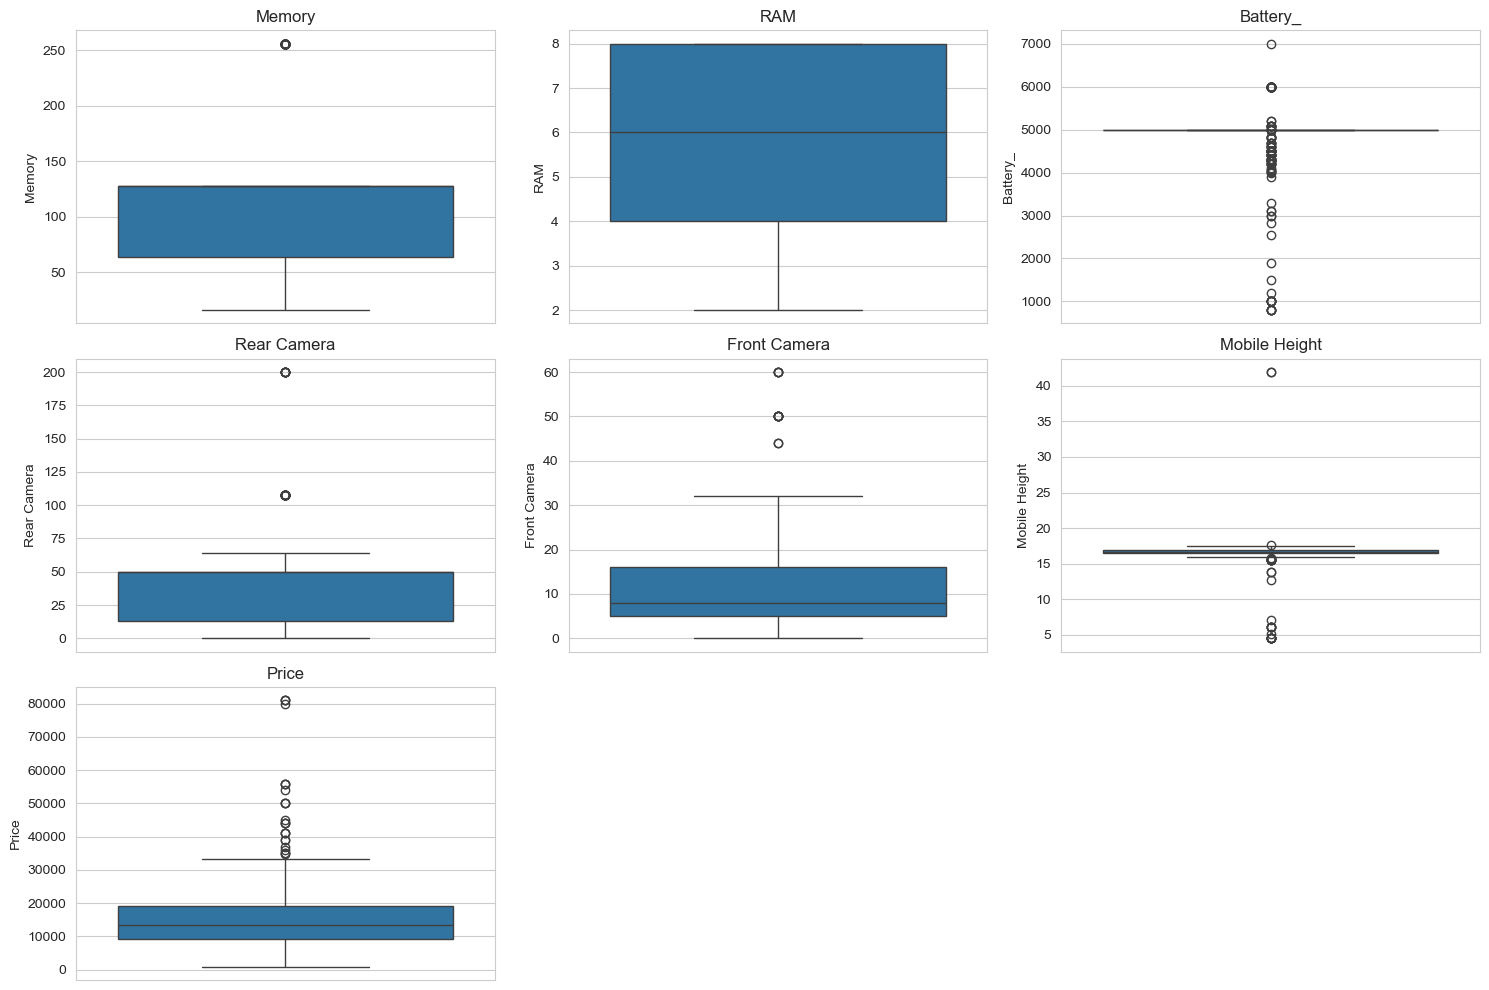

In [18]:
num_cols = ['Memory', 'RAM', 'Battery_', 'Rear Camera', 'Front Camera', 'Mobile Height', 'Price']
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

### Insights from Data Preprocessing

##### 1. Price Cleaning
* Was able to successfully convert price from string (with commas) to numeric.

##### 2. Memory and RAM
* Pulling numeric values out of these columns, setting them up for analysis.

##### 3. Battery Capacity
* There are some very low values (800mAh) that look fishy - they may be data entry mistakes or use in feature phones.

##### 4. Camera Specifications
* Pulled megapixel values out of both rear and front camera columns.

##### 5. Outliers (The boxplots show some outliers, especially in -)
* Battery_: Some extremely low values (800mAh) and extremely high values (7000mAh)
* Front Camera: Some extremely high values (60MP) which could be special versions
* Price: Some extremely high values which probably are genuine (high-end phones)
* High Cardinality: 'Model' and 'Processor_' columns have extremely high cardinality (238 and lots of different values respectively), which could present difficulties in encoding.
* AI Lens: Converted without problem to binary (1/0) denoting presence/absence.
* Mobile Height: Values appear normal, primarily 15-18 cm with no outliers.

## 3. EDA (Univariate, Bivariate and Multivariate)

### Distribution of Features

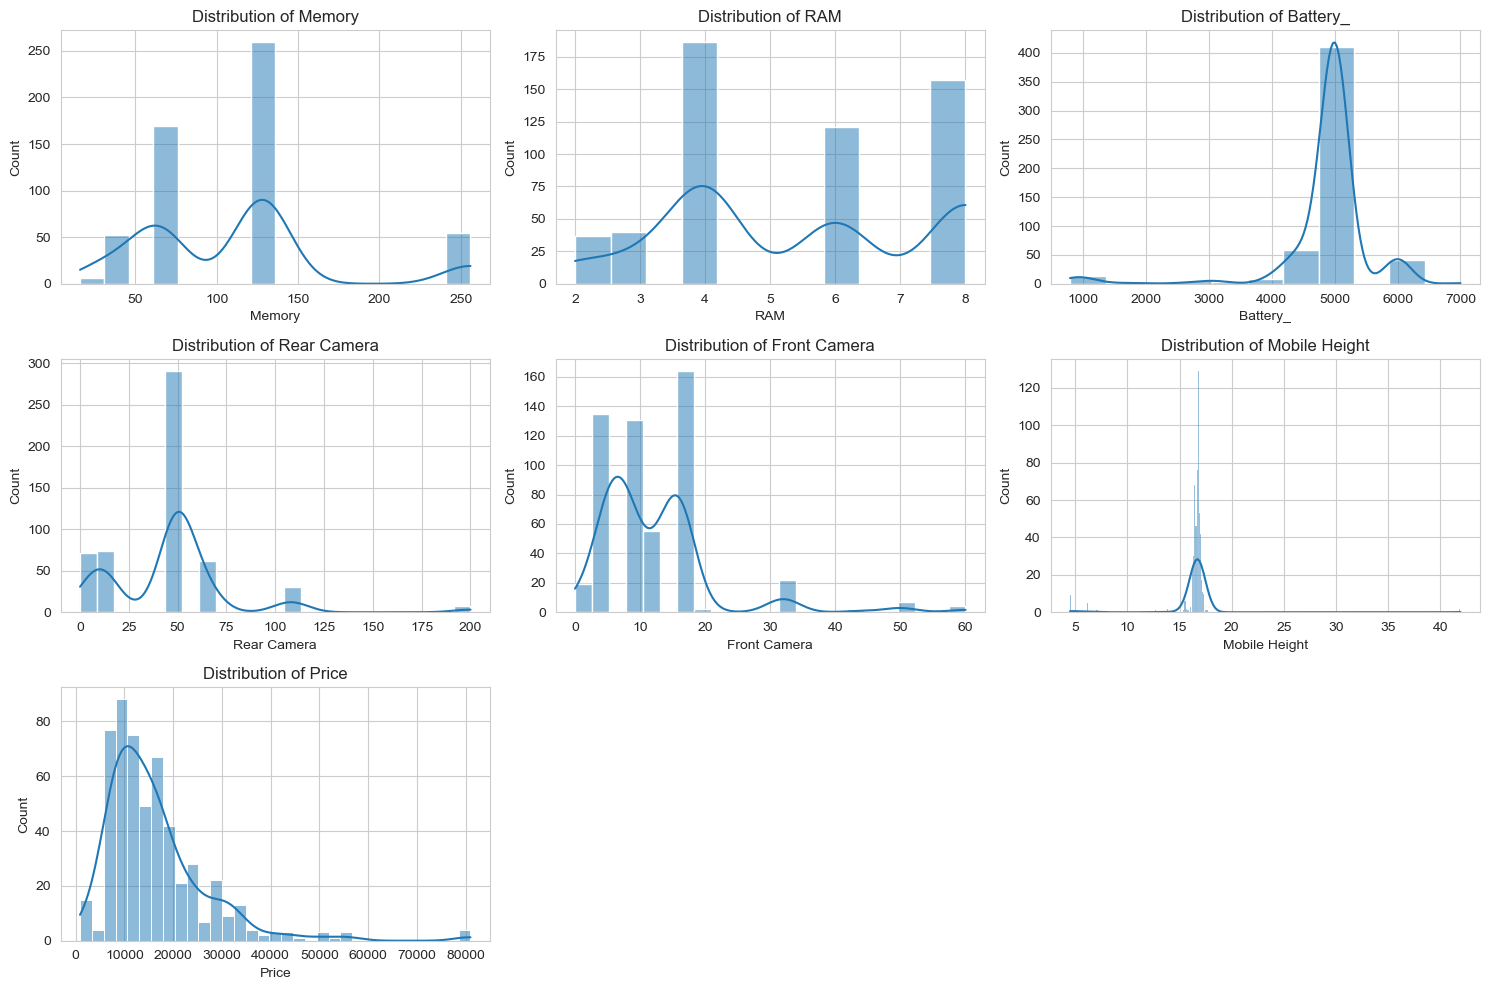

In [19]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

### Numeric Features vs Price

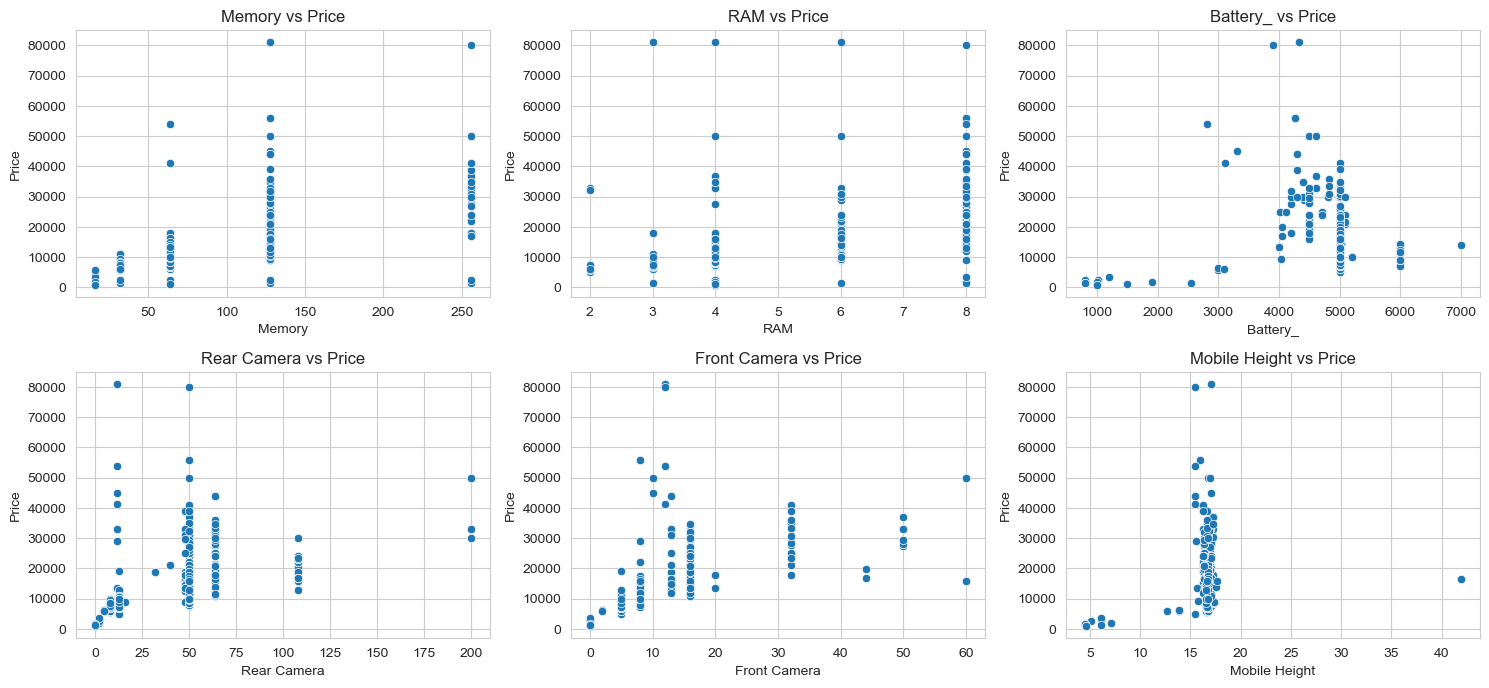

In [20]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols[:-1]):  # Exclude Price itself
    plt.subplot(3, 3, i+1)
    sns.scatterplot(x=df[col], y=df['Price'])
    plt.title(f"{col} vs Price")
plt.tight_layout()
plt.show()

### Categorical feature analysis

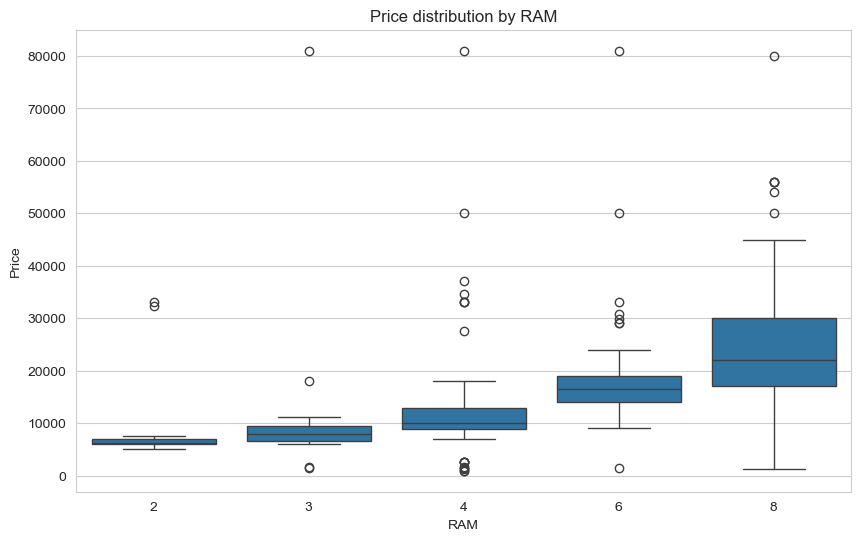

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='RAM', y='Price', data=df)
plt.title("Price distribution by RAM")
plt.show()

### Price distribution by Memory

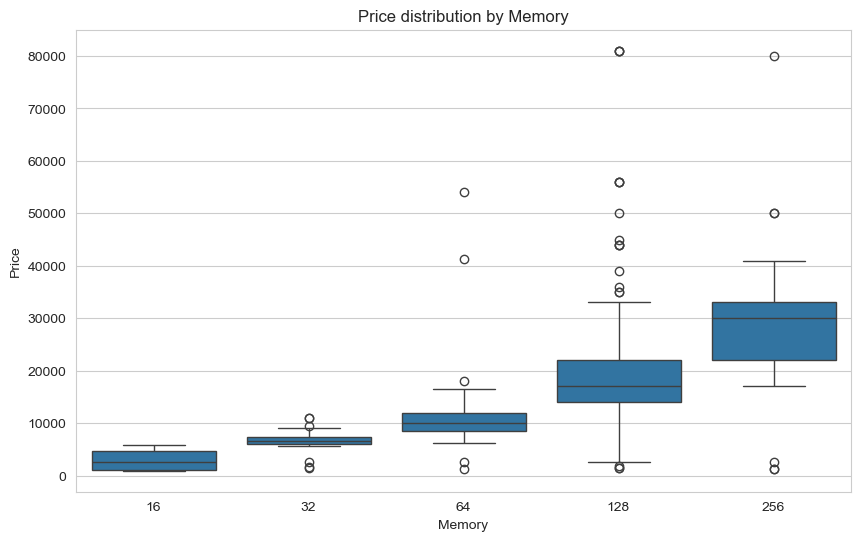

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Memory', y='Price', data=df)
plt.title("Price distribution by Memory")
plt.show()

### Distribution of Mobile Phone Prices

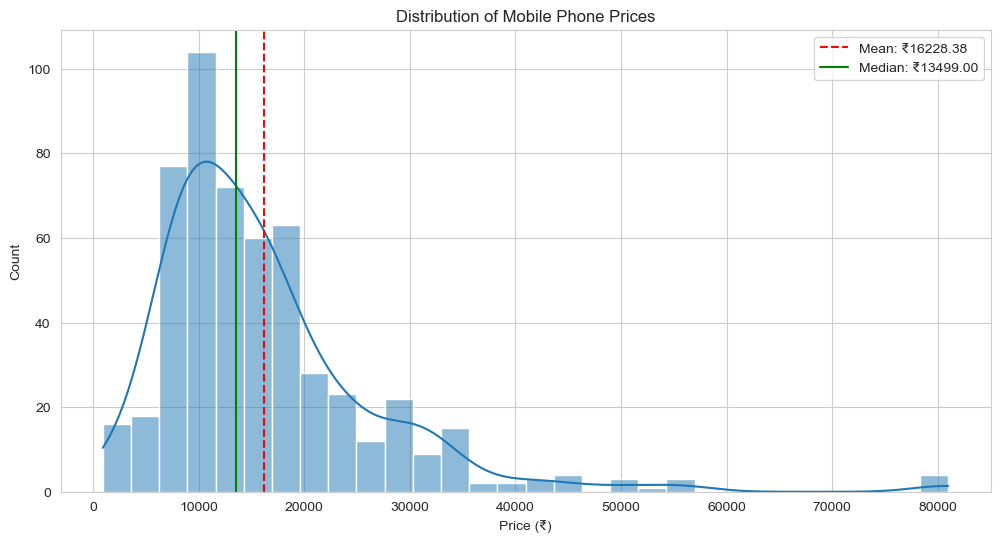

In [26]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Distribution of Mobile Phone Prices')
plt.xlabel('Price (₹)')
plt.ylabel('Count')
plt.axvline(df['Price'].mean(), color='r', linestyle='--', label=f'Mean: ₹{df["Price"].mean():.2f}')
plt.axvline(df['Price'].median(), color='g', linestyle='-', label=f'Median: ₹{df["Price"].median():.2f}')
plt.legend()
plt.show()

### Log-transformed price distribution

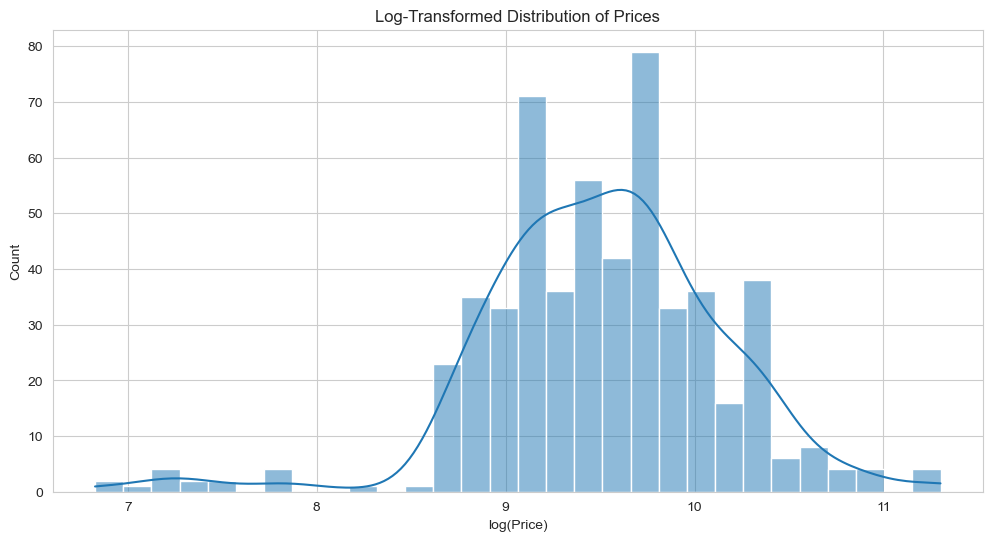

In [27]:
plt.figure(figsize=(12, 6))
sns.histplot(np.log1p(df['Price']), bins=30, kde=True)
plt.title('Log-Transformed Distribution of Prices')
plt.xlabel('log(Price)')
plt.ylabel('Count')
plt.show()

### Top 10 Brands by Count

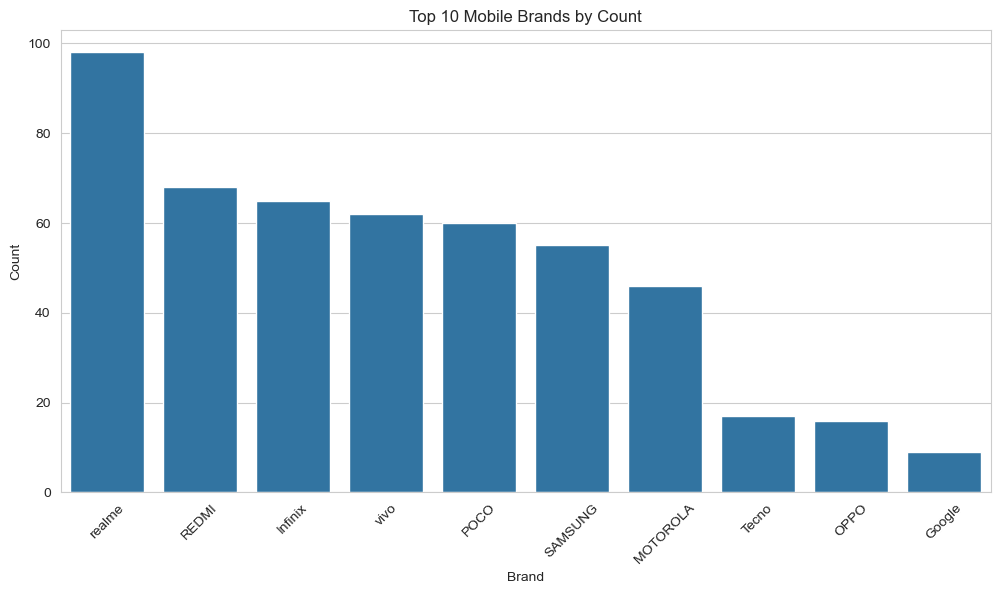

In [28]:
plt.figure(figsize=(12, 6))
df['Brand'] = df['Model'].str.split().str[0]
top_brands = df['Brand'].value_counts().nlargest(10)
sns.barplot(x=top_brands.index, y=top_brands.values)
plt.title('Top 10 Mobile Brands by Count')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Price distribution by Brand (Top 5)

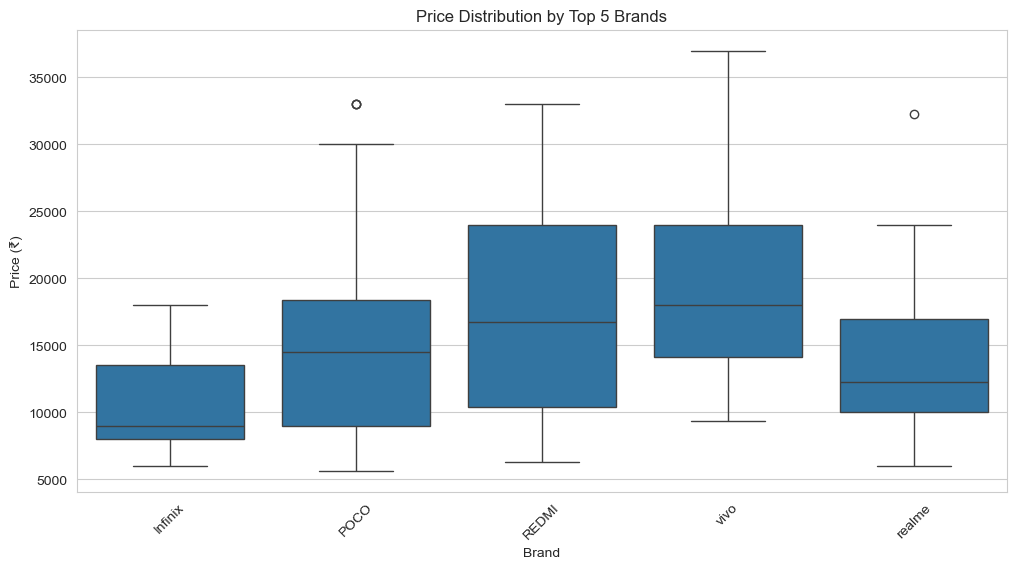

In [29]:
top_5_brands = df['Brand'].value_counts().nlargest(5).index
plt.figure(figsize=(12, 6))
sns.boxplot(x='Brand', y='Price', data=df[df['Brand'].isin(top_5_brands)])
plt.title('Price Distribution by Top 5 Brands')
plt.xlabel('Brand')
plt.ylabel('Price (₹)')
plt.xticks(rotation=45)
plt.show()

### Pairplot of key numerical features

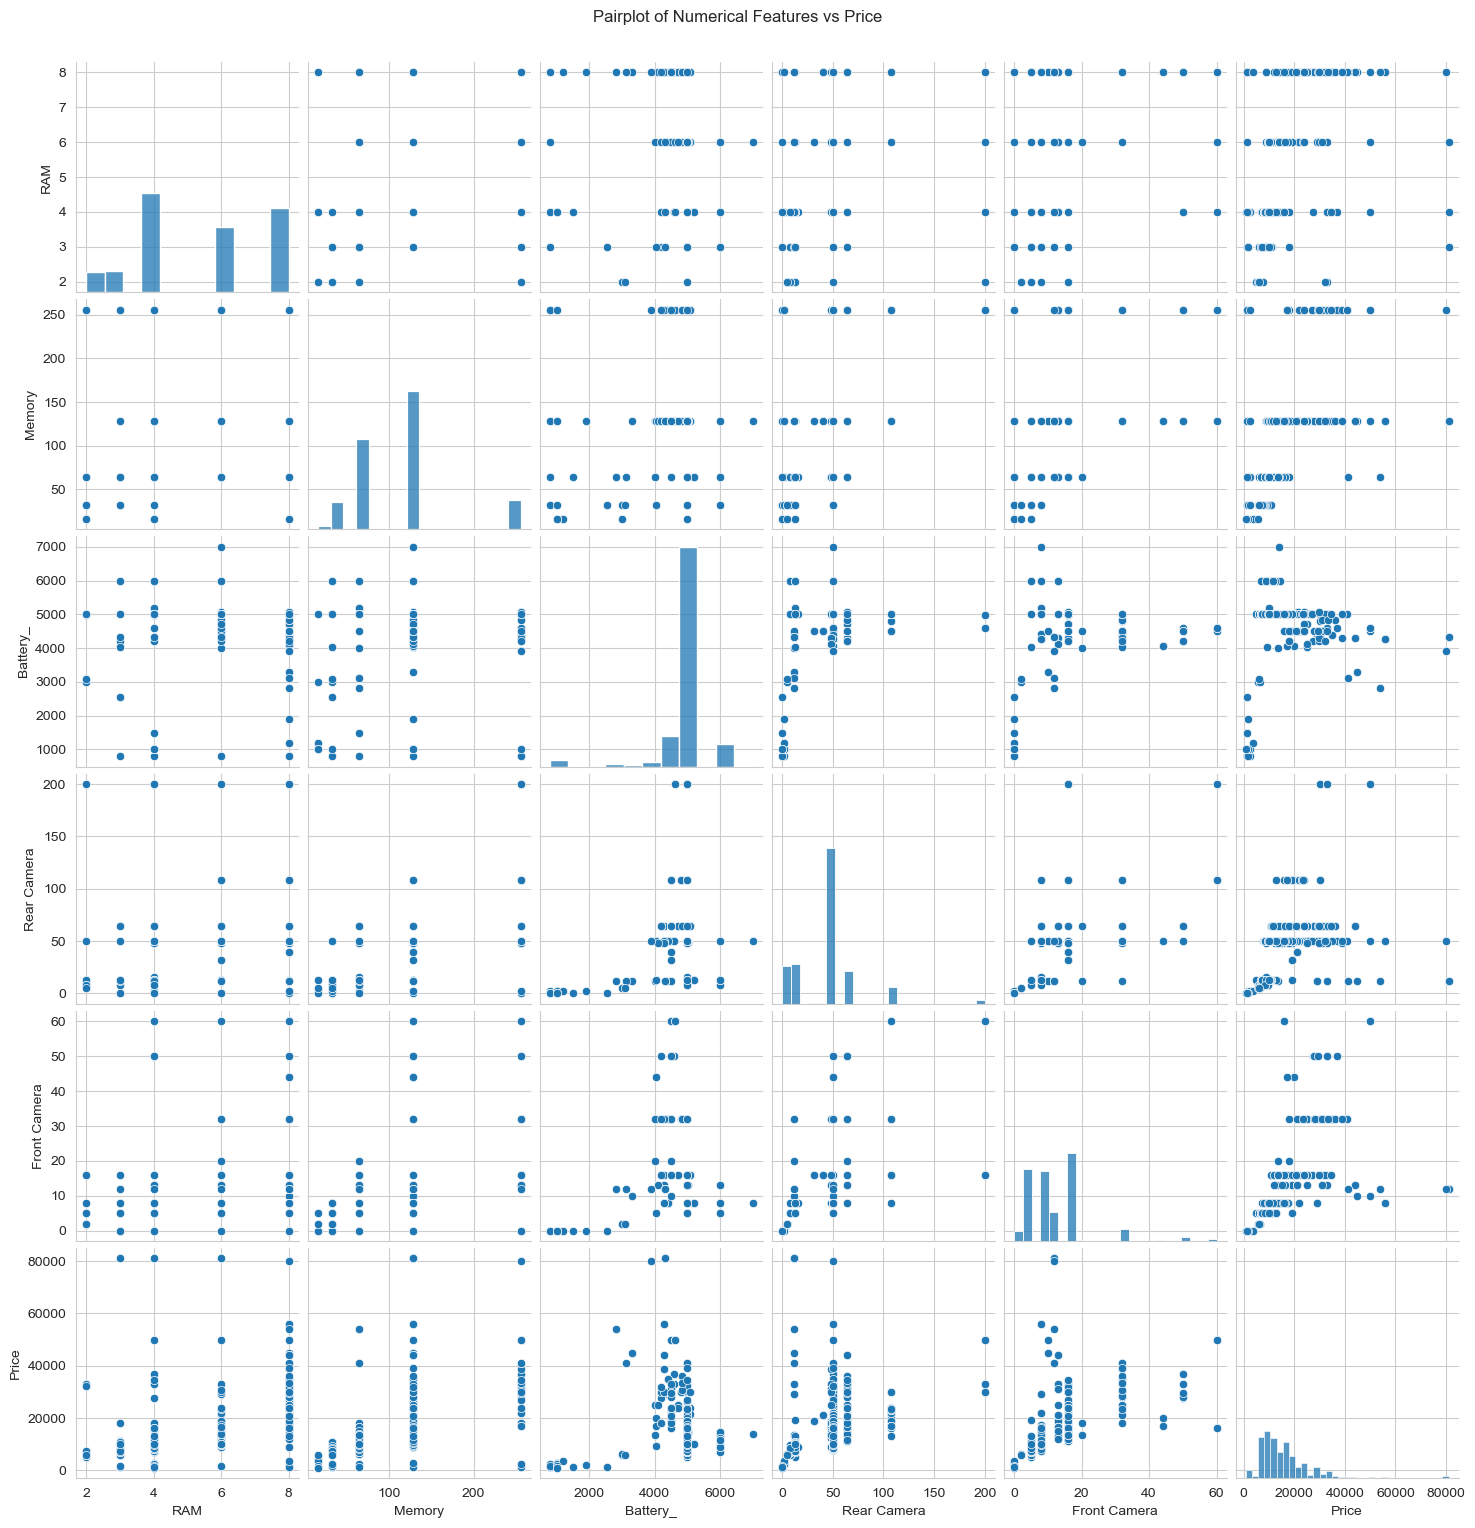

In [30]:
sns.pairplot(df[['RAM', 'Memory', 'Battery_', 'Rear Camera', 'Front Camera', 'Price']])
plt.suptitle('Pairplot of Numerical Features vs Price', y=1.02)
plt.show()

###  Heatmap of numerical feature correlations

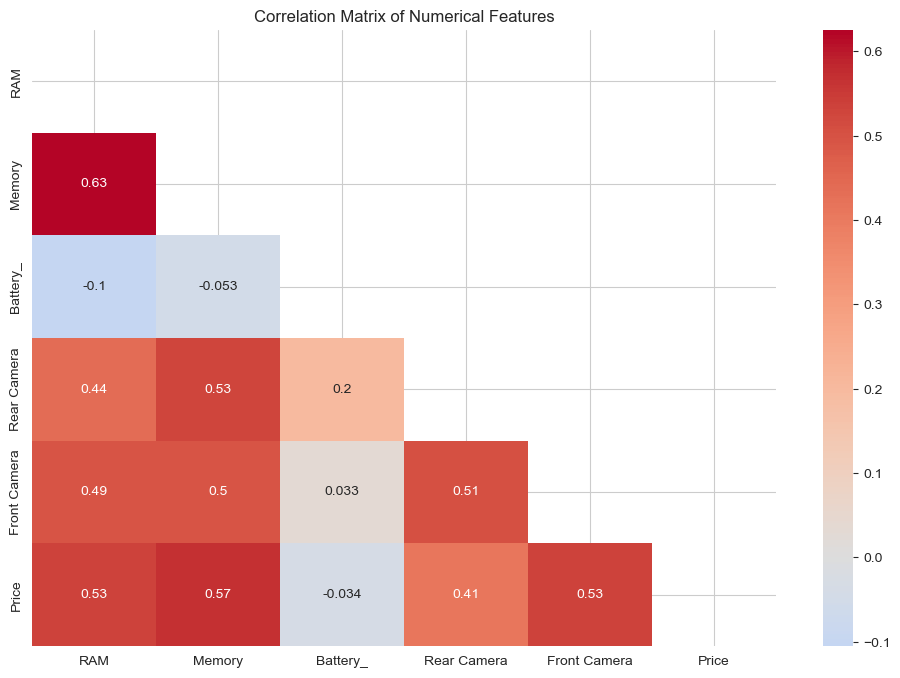

In [31]:
plt.figure(figsize=(12, 8))
corr = df[['RAM', 'Memory', 'Battery_', 'Rear Camera', 'Front Camera', 'Price']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, mask=np.triu(np.ones_like(corr, dtype=bool)))
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### RAM vs Price

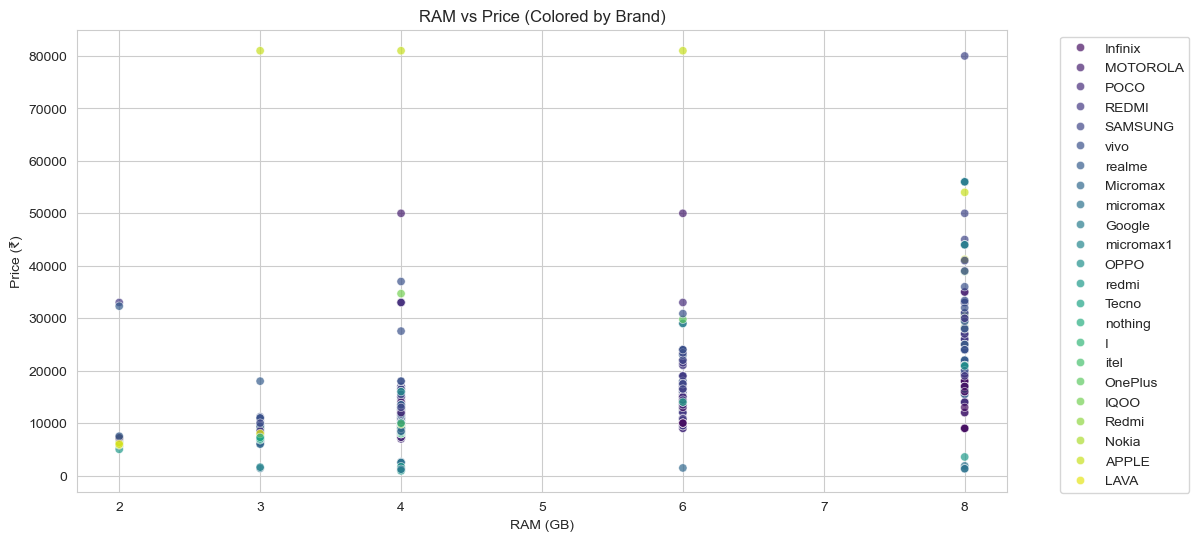

In [32]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='RAM', y='Price', data=df, hue='Brand', palette='viridis', alpha=0.7)
plt.title('RAM vs Price (Colored by Brand)')
plt.xlabel('RAM (GB)')
plt.ylabel('Price (₹)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Memory vs Price

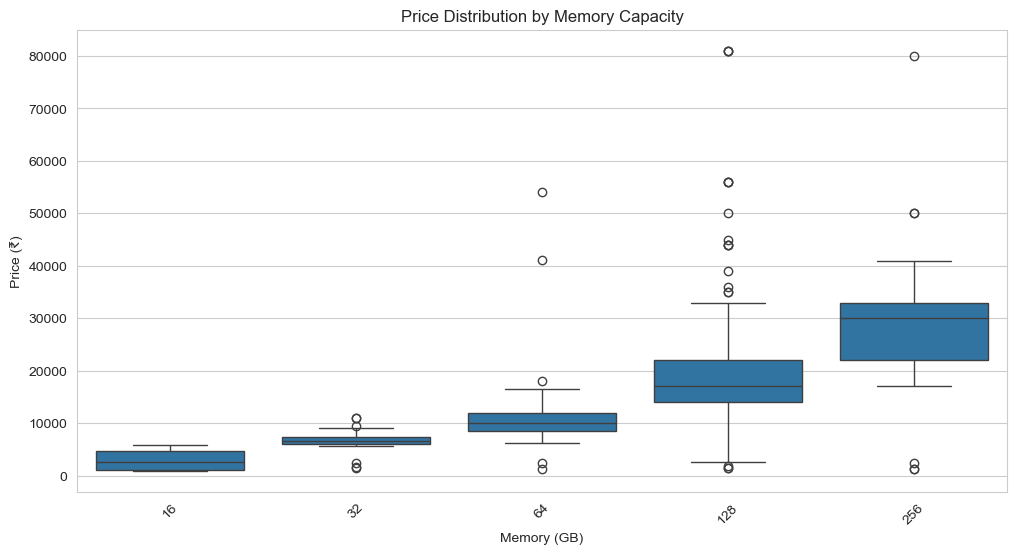

In [33]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Memory', y='Price', data=df)
plt.title('Price Distribution by Memory Capacity')
plt.xlabel('Memory (GB)')
plt.ylabel('Price (₹)')
plt.xticks(rotation=45)
plt.show()

### Camera configuration analysis

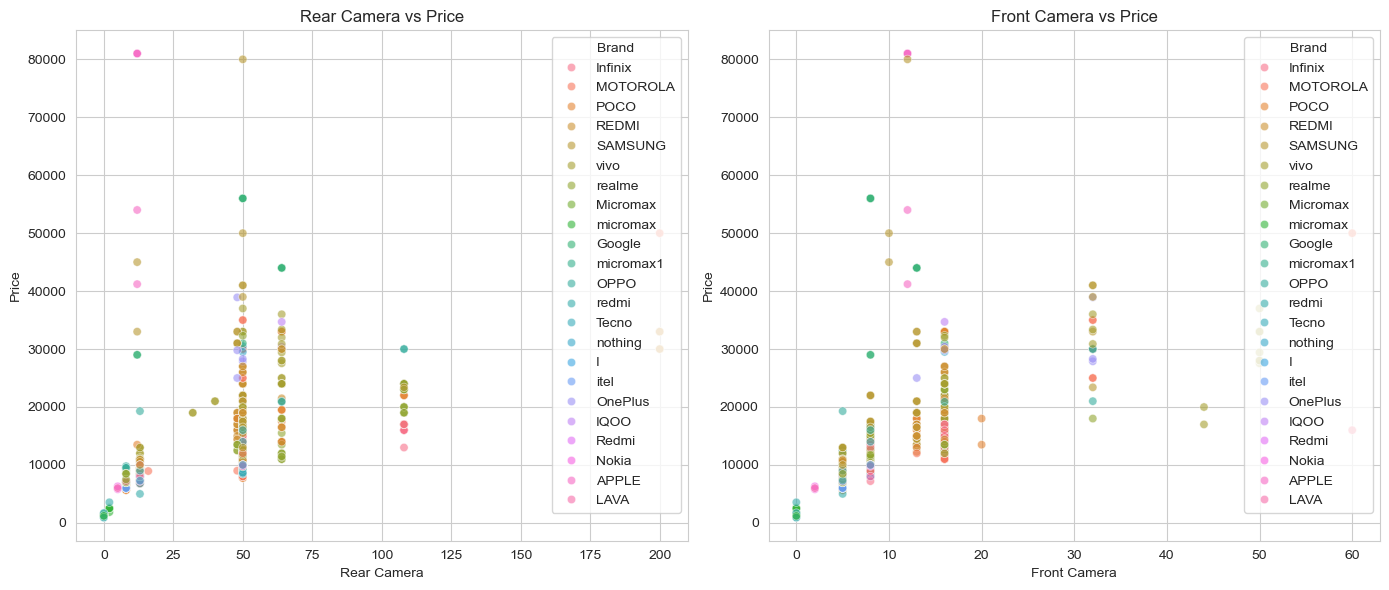

In [35]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='Rear Camera', y='Price', data=df, hue='Brand', alpha=0.6)
plt.title('Rear Camera vs Price')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Front Camera', y='Price', data=df, hue='Brand', alpha=0.6)
plt.title('Front Camera vs Price')
plt.tight_layout()
plt.show()

### Camera MP sum vs Price

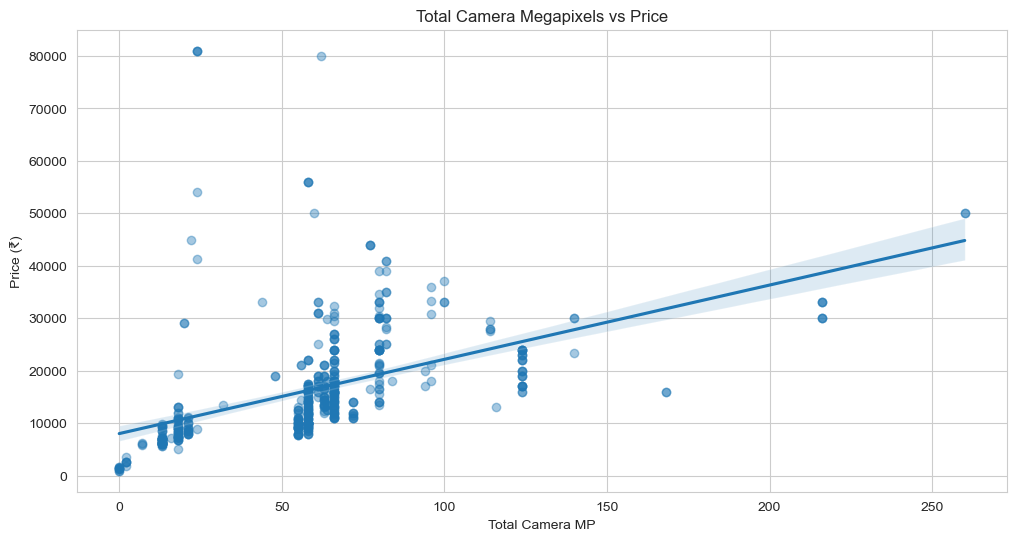

In [36]:
df['Total_Camera_MP'] = df['Rear Camera'] + df['Front Camera']
plt.figure(figsize=(12, 6))
sns.regplot(x='Total_Camera_MP', y='Price', data=df, scatter_kws={'alpha':0.4})
plt.title('Total Camera Megapixels vs Price')
plt.xlabel('Total Camera MP')
plt.ylabel('Price (₹)')
plt.show()

### Battery vs Price with RAM as hue)

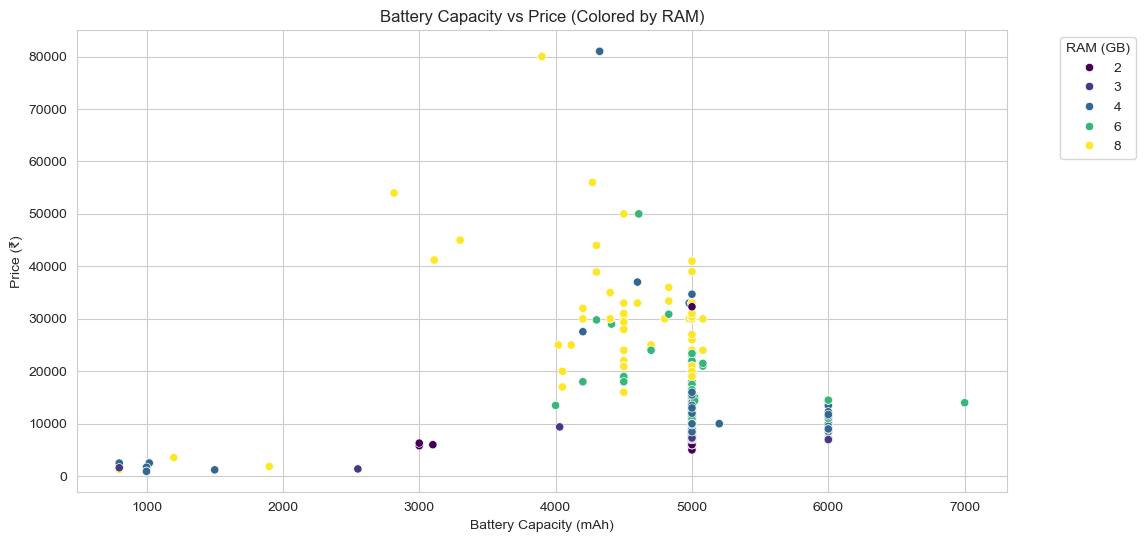

In [37]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Battery_', y='Price', data=df, hue='RAM', palette='viridis')
plt.title('Battery Capacity vs Price (Colored by RAM)')
plt.xlabel('Battery Capacity (mAh)')
plt.ylabel('Price (₹)')
plt.legend(title='RAM (GB)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Battery distribution by Brand

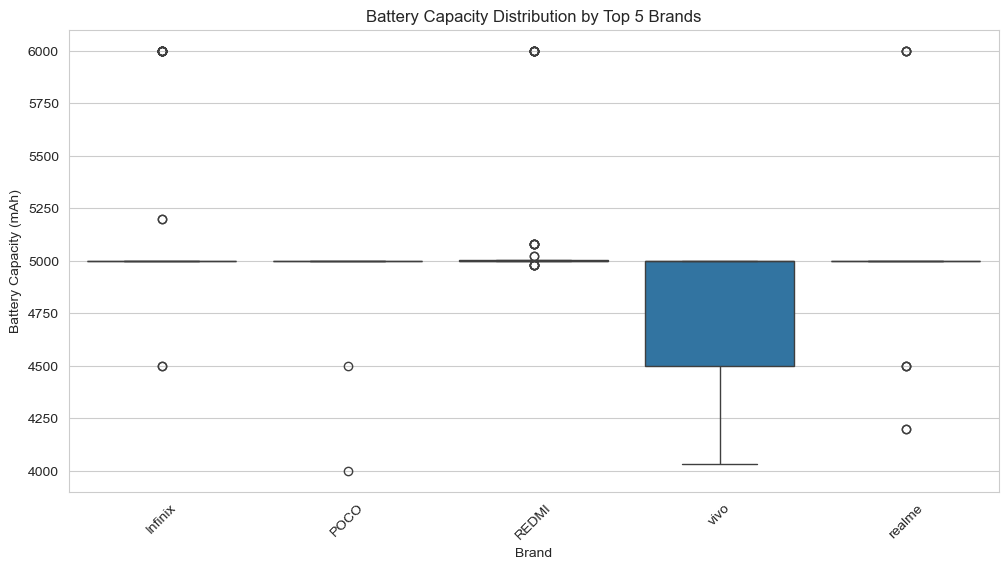

In [38]:
top_5_brands = df['Brand'].value_counts().nlargest(5).index
plt.figure(figsize=(12, 6))
sns.boxplot(x='Brand', y='Battery_', data=df[df['Brand'].isin(top_5_brands)])
plt.title('Battery Capacity Distribution by Top 5 Brands')
plt.xlabel('Brand')
plt.ylabel('Battery Capacity (mAh)')
plt.xticks(rotation=45)
plt.show()

### Price comparison with/without AI Lens

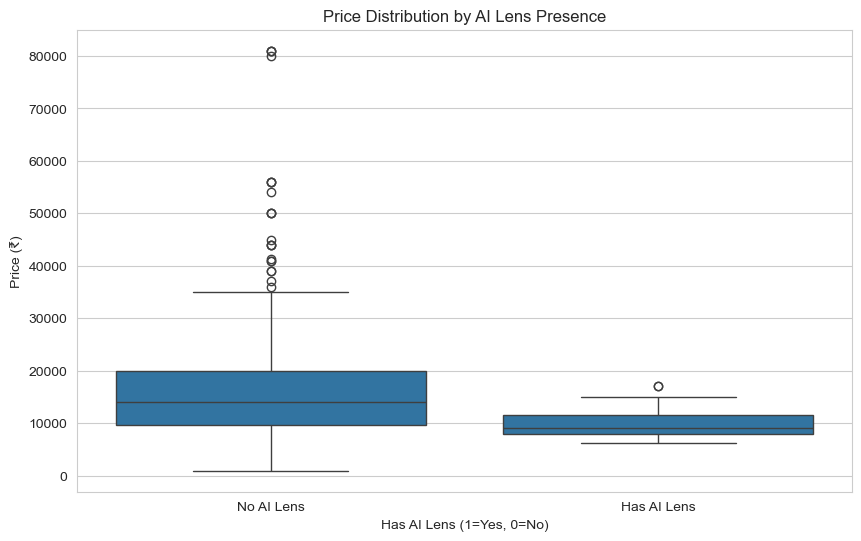

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='AI Lens', y='Price', data=df)
plt.title('Price Distribution by AI Lens Presence')
plt.xlabel('Has AI Lens (1=Yes, 0=No)')
plt.ylabel('Price (₹)')
plt.xticks([0, 1], ['No AI Lens', 'Has AI Lens'])
plt.show()

### AI Lens penetration by Brand

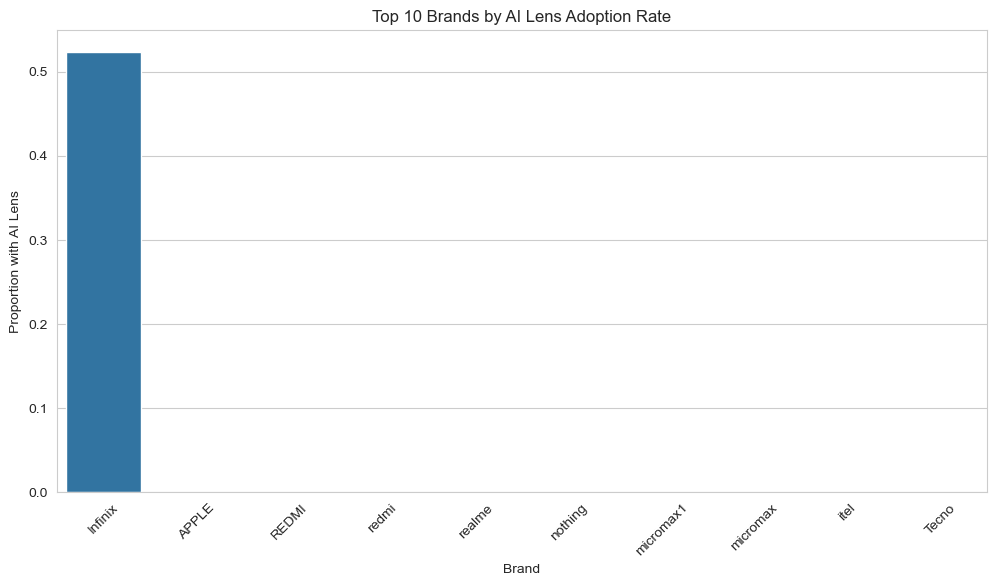

In [40]:
ai_by_brand = df.groupby('Brand')['AI Lens'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=ai_by_brand.index, y=ai_by_brand.values)
plt.title('Top 10 Brands by AI Lens Adoption Rate')
plt.xlabel('Brand')
plt.ylabel('Proportion with AI Lens')
plt.xticks(rotation=45)
plt.show()

### 3D Plot of RAM, Memory, and Price

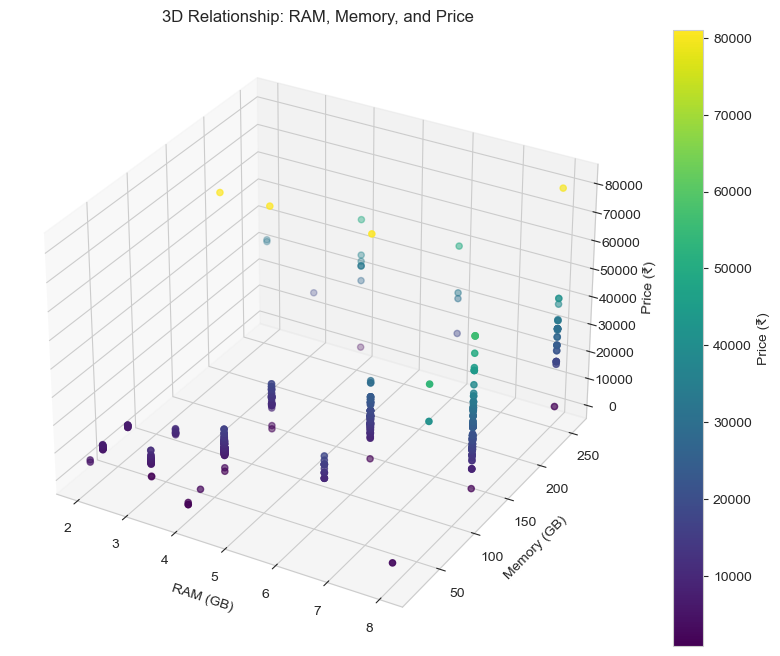

In [41]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['RAM'], df['Memory'], df['Price'], c=df['Price'], cmap='viridis')
ax.set_xlabel('RAM (GB)')
ax.set_ylabel('Memory (GB)')
ax.set_zlabel('Price (₹)')
plt.title('3D Relationship: RAM, Memory, and Price')
fig.colorbar(scatter, ax=ax, label='Price (₹)')
plt.show()

### FacetGrid of RAM vs Price by Memory tiers

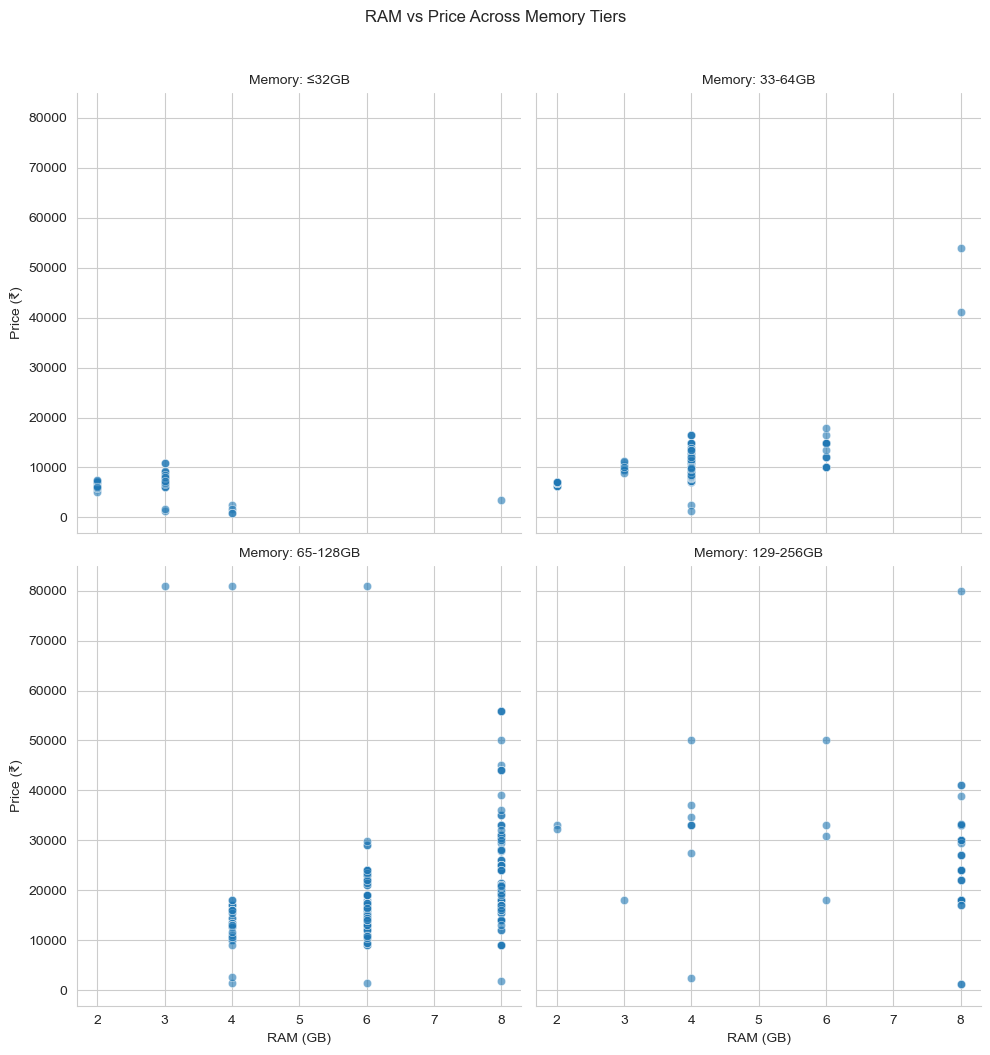

In [42]:
df['Memory_tier'] = pd.cut(df['Memory'], bins=[0, 32, 64, 128, 256], labels=['≤32GB', '33-64GB', '65-128GB', '129-256GB'])
g = sns.FacetGrid(df, col='Memory_tier', col_wrap=2, height=5)
g.map(sns.scatterplot, 'RAM', 'Price', alpha=0.6)
g.set_axis_labels('RAM (GB)', 'Price (₹)')
g.set_titles('Memory: {col_name}')
plt.suptitle('RAM vs Price Across Memory Tiers', y=1.05)
plt.show()